# E-Signing of Loan-Based on Financial History 

# Financial Data Set 

# Team Name : Supreme Group 

### Team members : Manne Bhanu Nithin Yadav , Ameer Mittigar, Nithin Reddy Muduganti, Neehar Sai Gopishetty, Dilli Prasad Sigirala 

### Description 

Here we are going to use the financial data set from kaggle https://nam04.safelinks.protection.outlook.com/?url=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fyashpaloswal%2Fesigning-of-loanbased-on-financial-history&data=05%7C01%7Cbhanunithinyadav%40usf.edu%7C734692f1c81e4457276208da9f349c6e%7C741bf7dee2e546df8d6782607df9deaa%7C0%7C0%7C637997345549522488%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=aGgnd%2FZZtpeL%2BoAroZLktfe5X6EUo5a%2FtnYn4O9GhHc%3D&reserved=0 , we will be going to perform multiple  logistic regressions which include hyperparameter tuning and conclude which is the best fit model for the aapproved dataset.

Import all the required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

Loading the data 

In [2]:
df = pd.read_csv("C:/Users/Nithin Yadav/Downloads/Financial-Data[1].csv")
df

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [3]:
df.head() #we can view the first 5 rows and all the columns of the dataset as follows

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


Cleaning the data is performed in the following steps

In [4]:
df.columns 

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [1]:
df.describe()

NameError: name 'df' is not defined

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [6]:
df.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [7]:
print(df.pay_schedule.unique())

['bi-weekly' 'weekly' 'semi-monthly' 'monthly']


In [8]:
df.pay_schedule

0           bi-weekly
1              weekly
2              weekly
3           bi-weekly
4        semi-monthly
             ...     
17903         monthly
17904       bi-weekly
17905          weekly
17906       bi-weekly
17907          weekly
Name: pay_schedule, Length: 17908, dtype: object

Label encoder is used to normalize the lables, can convert non numerical labels to numerical values which is used to perfrom the furthur process

In [9]:
enc = LabelEncoder() 
df.pay_schedule = enc.fit_transform(df[['pay_schedule']])
df.head()

C:\Users\Nithin Yadav\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,0,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,3,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,3,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,0,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,2,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


Here we are dropping the unwanted/not used data columns for better results 

In [10]:
df = df.drop(columns=['Entry_id', 'months_employed', 'years_employed','risk_score_2','risk_score_3','risk_score_4','risk_score_5','ext_quality_score_2'])
df

,age,pay_schedule,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,ext_quality_score,inquiries_last_month,e_signed
0,40,0,1,3135,3,6,2,1,550,36200,0.580918,10,1
1,61,3,0,3180,3,2,7,1,600,30150,0.730720,9,0
2,23,3,0,1540,0,7,1,1,450,34550,0.531712,7,0
3,40,0,0,5230,1,2,7,1,700,42150,0.792552,8,1
4,33,2,0,3590,2,2,8,1,1100,53850,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,1,0,3245,3,2,6,1,700,71700,0.727705,2,0
17904,46,0,0,6525,1,3,3,1,800,51800,0.774918,3,0
17905,46,3,0,2685,1,1,8,1,1200,59650,0.472045,9,0
17906,42,0,0,2515,5,6,1,1,400,80200,0.406568,3,1


## Test Train split Process

In [11]:
train_df, test_df = train_test_split(df, train_size=0.3, random_state = 1)

In [12]:
X_train = train_df.drop(columns=['e_signed'])#columns other than target variable 
y_train = train_df.e_signed #target variable
X_test = test_df.drop(columns=['e_signed']) #columns other than target variable 
y_test = test_df.e_signed #target variable

In [13]:
df['e_signed'].value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

## Default Logistic Regression

We will be implementing the default Logistic regression

In [2]:
logClassifier=LogisticRegression(random_state=1) # Create the model
_ = logClassifier.fit(X_train,y_train) # fit the model to training data.

NameError: name 'LogisticRegression' is not defined

## Measure performance of model on validation data

NOTE: This is a demonstration. There is no preference to any specific scoring metric.

In [15]:
pd.DataFrame({"predicted":logClassifier.predict(X_test),"actual":y_test})

,predicted,actual
2047,0,0
4385,1,0
813,1,0
14920,1,1
16163,1,1
...,...,...
1456,0,0
5976,1,1
7320,1,0
11137,1,0


In [16]:
y_pred = logClassifier.predict(X_test)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

***********************
Recall Score:     0.775
***********************
Accuracy Score:   0.567
Precision Score:  0.571
F1 Score:         0.657
***********************


After performing the default logistic regression we are able to get out recall score as 0.775 , accuracy as 0.567 , precision score as 0.571 and F1 score as 0.657
The recall score is decent and we need try performing another types of logistic regression and find which improves the scores so that we can conclude which regression type model is best fit for out data set

#  Logistic Regression with threshold

#### Here we will be using the threshold value of 0.40 where I find it as an suitable value which helps us to obtain maximum scores as threshold value is directly proportional to precision value where as it is indirectly proportional to the recall score 

In [40]:
THRESHOLD = 0.40
y_pred_dthreshold25 = np.where(logClassifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame({"predicted":y_pred_dthreshold25,"actual":y_test})

,predicted,actual
2047,1,0
4385,1,0
813,1,0
14920,1,1
16163,1,1
...,...,...
1456,0,0
5976,1,1
7320,1,0
11137,1,0


In [41]:
y_pred = np.where(logClassifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

[[ 182 5628]
 [ 110 6616]]
***********************
Recall Score:     0.984
***********************
Accuracy Score:   0.542
Precision Score:  0.540
F1 Score:         0.698
***********************


#### After perfroming the logistic regression using threshold, we are able to increase the recall score of the model,After trying many values of threshold between 0 to 1 , I here by conclude that at 0.40 we are obtaining the maximum recall score

## Logistic Regression with Hyperparameter  tuning

## Hyperparameter Tuning for LogisticRegression

Logistic regression has very few parameters that are generally used for tuning.
  - See official documentation on sklearn logistic regression parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- You can see useful differences in performance or convergence with different solvers (solver).
    - Remember class when I described gradient descent? This is a process to identify the minimum of a loss function. The solve function parameter sets the method through which logistic regression will solve this problem of minimizing errors.
    - solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

- Regularization (penalty) can sometimes be helpful.
    - Regularization can be used to avoid overfitting. 
      - Penalized logistic regression imposes a penalty to the logistic model for having too many variables. This results in shrinking the coefficients of the less contributive variables toward zero. 
    - penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
      - Note: not all solvers support all regularization terms.
        - ‘newton-cg’ - [‘l2’, ‘none’]
        - ‘lbfgs’ - [‘l2’, ‘none’]
        - ‘liblinear’ - [‘l1’, ‘l2’]
        - ‘sag’ - [‘l2’, ‘none’]
        - ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

- The C parameter controls the penality strength, which can also be effective.
    - C in [100, 10, 1.0, 0.1, 0.01]


In [42]:
param_grid = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'penalty': ['l1', 'l2', 'none'], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [500000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }

In [43]:
best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=1),
                                    scoring='recall', param_grid=param_grid, 
                                    cv=2, verbose=0,  n_jobs = -1)
best_logClassifer = best_logClassifer.fit(X_train, y_train)

C:\Users\Nithin Yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nithin Yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nithin Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Nithin Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solve

In [44]:
y_pred = best_logClassifer.predict(X_test)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

***********************
Recall Score:     0.950
***********************
Accuracy Score:   0.546
Precision Score:  0.544
F1 Score:         0.692
***********************


After performing the logistic regression with hyperparameter tuning we are able to increase our recall score to 0.950 alsong with recall score we are able to increase the f1 score.But as the recall score is indirectly proportional to precision score so th precision score and the accuracy is slightly reduced with respective to the other previously performed logisitic regression methods.
over all we can say logisitc regression with hyperparamter tuning is the best fit for the model

# Creating both ROC curve and Precision/Recall chart 

Roc curve of Default logistic regression model 

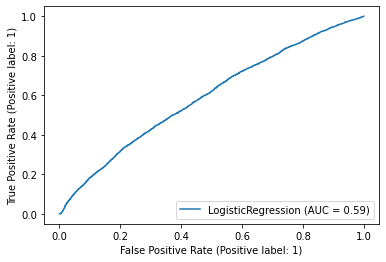

In [50]:
RocCurveDisplay.from_estimator(logClassifier, X_test, y_test) 
plt.show()

Roc curve of Logisitic regression with Hyperparameter tuning

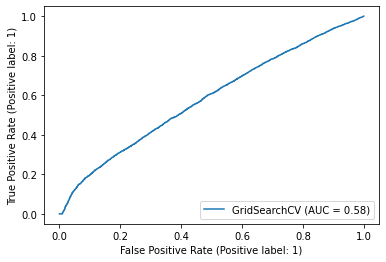

In [45]:
RocCurveDisplay.from_estimator(best_logClassifer, X_test, y_test) 
plt.show()

Precision/Recall curve of default logistic regression

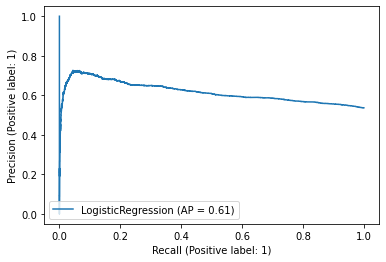

In [51]:
PrecisionRecallDisplay.from_estimator(logClassifier, X_test, y_test) 
plt.show()

Precision/Recall score of Logistic regression with hyper parameter tuning

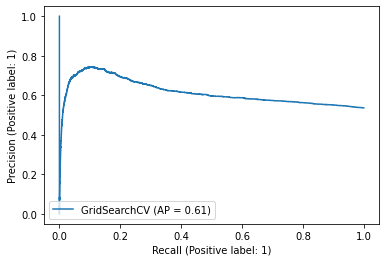

In [48]:
PrecisionRecallDisplay.from_estimator(best_logClassifer, X_test, y_test) 
plt.show()

# Conclusion

In this assignment we have performed the following methods:
1. Default Logisitic Regression
2. Logisitic Regression with Threshold
3. Logistic Regression with Hyperparameter tuning
4. Roc Curve and Precision/Recall curve 

In this assignment we have used our financial dataset to predict whether a person has completed their electronic sign process or not.
We have implemented the default logistic regression model to our data set and we have obtained the recall score of "0.775".

To increase the recall score value of the model we have used the logisitic regression model with implementing the usage of theshold value. After some trials we have finally found our suitable threshold value which is "0.40" where our recall score has increased  to "0.984".After performing this model we conclude that we can increase our recall score with the help of threshold but at the same time our threshold value should not affect our precison value as both are indirectly proportional to each other 

The next process we have performed is Logsitc regression with hyperparameter tuning. Here we have used the threshold value which we have obtained earlier and performed the process. The recall score we obtained was "0.950". There is a very slight  decrease in the recall score with respective to the prior regression model we performed. But overall we are here to conclude that after tuning and usage of threshold we are able to increase our recall score with respect to the default logistic regression model. Hence, we conclude that Logistic regression wth the Hyper parameter tuning is the best fit for our dat set.

Roc and Precision/Recall score :

Here we have performed the Roc curve display for both defult logistic regression and logisitic regression with Hyper paramter tuning.
For default logisitic regression we have obtained  the AUC value as "0.59" where as for Logistic regressic with Hyper parameter model we have obtained the AUC value as "0.58" which is approximately equal where we can interpret the results. In general the AUC value when it is more than 0.6 is considered as the good score to take into consideration. As the values are almost equal to 0.6 we here by imply that our model can be used to interpret the data efficeintly.

The final process we have performed is displaying the Precision/Recall score :
Here we have perfromed the Precsion/Recall score for both default logistic regression and logisitic regression with hyperparamter tuning.
The AP score we obtained for both default logisitic regression and Logistic regression with hyper paramter tuning is "0.61".
Here we can interpret that high precision relates to a low FP rate , where as high recall relates low FN rate. Overall we can say that the average precision score we obtained is a decent score to evaluate the model.
